In [85]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [86]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [87]:
train_dir = 'data/train/'
val_dir = 'data/test/'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 10

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [88]:
    model.load_weights('model.h5')
    emotion_dict = {0: "Enfadad@", 1: "Disgustad@", 2: "Temeros@", 3: "Content@", 4: "Neutral", 5: "Triste", 6: "Sorprendid@"}
    img = cv2.imread('imgs/AlbertoTriste.jpg')
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x, y, w, h = faces[0]
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    emotion_dict[maxindex]

'Temeros@'

Epoch 1/10
448/448 [==============================] - 215s 479ms/step - loss: 1.8284 - accuracy: 0.2558 - val_loss: 1.7479 - val_accuracy: 0.2965
Epoch 2/10
448/448 [==============================] - 210s 469ms/step - loss: 1.6817 - accuracy: 0.3362 - val_loss: 1.5527 - val_accuracy: 0.4093
Epoch 3/10
448/448 [==============================] - 208s 464ms/step - loss: 1.5548 - accuracy: 0.3997 - val_loss: 1.4692 - val_accuracy: 0.4376
Epoch 4/10
448/448 [==============================] - 211s 471ms/step - loss: 1.4853 - accuracy: 0.4296 - val_loss: 1.4169 - val_accuracy: 0.4701
Epoch 5/10
448/448 [==============================] - 205s 457ms/step - loss: 1.4175 - accuracy: 0.4659 - val_loss: 1.3756 - val_accuracy: 0.4763
Epoch 6/10
448/448 [==============================] - 202s 452ms/step - loss: 1.3742 - accuracy: 0.4743 - val_loss: 1.3204 - val_accuracy: 0.4973
Epoch 7/10
448/448 [==============================] - 212s 473ms/step - loss: 1.3225 - accuracy: 0.5016 - val_loss: 1.2848 -

C:\Users\alblopez\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
C:\Users\alblopez\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


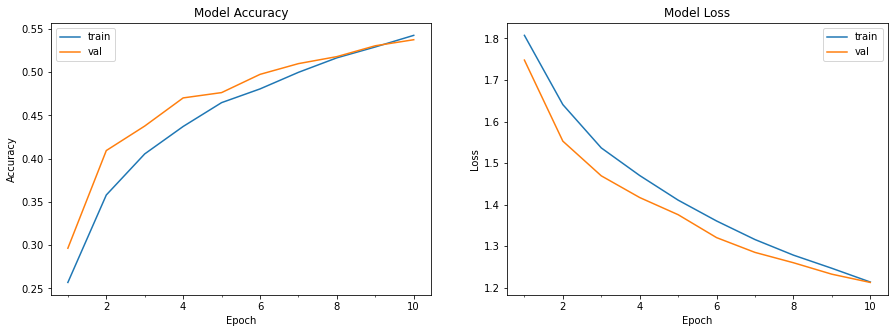

In [26]:
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
    model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
    plot_model_history(model_info)
    model.save_weights('model_1.h5')

Epoch 1/25
448/448 [==============================] - 214s 476ms/step - loss: 1.8228 - accuracy: 0.2474 - val_loss: 1.6773 - val_accuracy: 0.3532
Epoch 2/25
448/448 [==============================] - 208s 464ms/step - loss: 1.6496 - accuracy: 0.3515 - val_loss: 1.5326 - val_accuracy: 0.4237
Epoch 3/25
448/448 [==============================] - 209s 467ms/step - loss: 1.5267 - accuracy: 0.4174 - val_loss: 1.4453 - val_accuracy: 0.4494
Epoch 4/25
448/448 [==============================] - 212s 473ms/step - loss: 1.4595 - accuracy: 0.4397 - val_loss: 1.4026 - val_accuracy: 0.4743
Epoch 5/25
448/448 [==============================] - 205s 458ms/step - loss: 1.3930 - accuracy: 0.4683 - val_loss: 1.3294 - val_accuracy: 0.5021
Epoch 6/25
448/448 [==============================] - 200s 447ms/step - loss: 1.3338 - accuracy: 0.4965 - val_loss: 1.2951 - val_accuracy: 0.5032
Epoch 7/25
448/448 [==============================] - 204s 456ms/step - loss: 1.2948 - accuracy: 0.5052 - val_loss: 1.2565 -

C:\Users\alblopez\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
C:\Users\alblopez\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


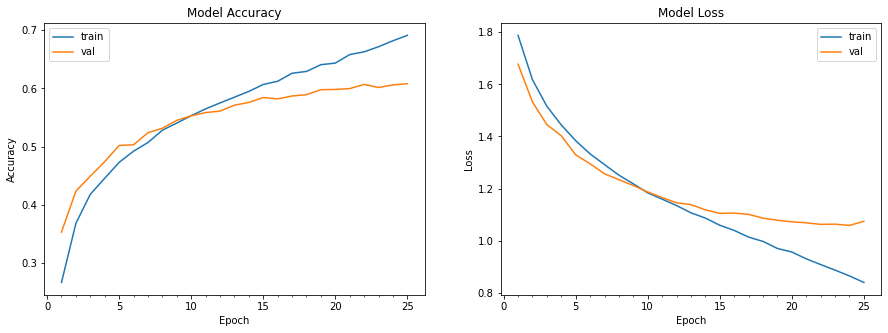

In [24]:
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
    model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
    plot_model_history(model_info)
    model.save_weights('model_1.h5')

Epoch 1/100
448/448 [==============================] - 201s 447ms/step - loss: 1.8311 - accuracy: 0.2458 - val_loss: 1.7677 - val_accuracy: 0.3278
Epoch 2/100
448/448 [==============================] - 202s 452ms/step - loss: 1.6882 - accuracy: 0.3303 - val_loss: 1.5503 - val_accuracy: 0.4081
Epoch 3/100
448/448 [==============================] - 201s 449ms/step - loss: 1.5576 - accuracy: 0.4001 - val_loss: 1.4560 - val_accuracy: 0.4417
Epoch 4/100
448/448 [==============================] - 202s 452ms/step - loss: 1.4640 - accuracy: 0.4415 - val_loss: 1.3959 - val_accuracy: 0.4725
Epoch 5/100
448/448 [==============================] - 200s 446ms/step - loss: 1.3910 - accuracy: 0.4700 - val_loss: 1.3453 - val_accuracy: 0.4851
Epoch 6/100
448/448 [==============================] - 197s 439ms/step - loss: 1.3320 - accuracy: 0.4921 - val_loss: 1.2886 - val_accuracy: 0.5114
Epoch 7/100
448/448 [==============================] - 196s 438ms/step - loss: 1.3018 - accuracy: 0.5076 - val_loss: 1

C:\Users\alblopez\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
C:\Users\alblopez\.conda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


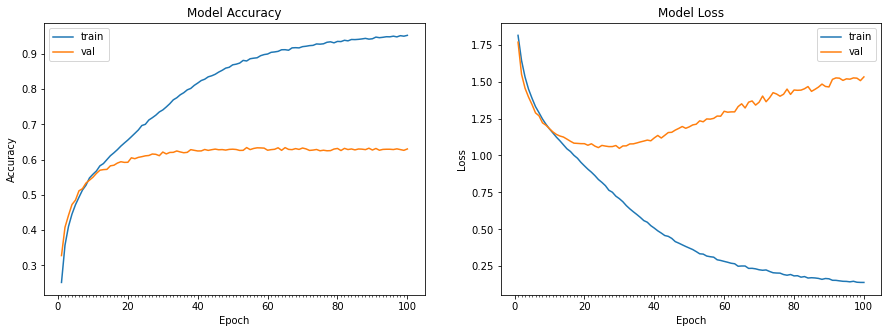

In [21]:
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
    model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)
    plot_model_history(model_info)
    model.save_weights('model_1.h5')